# **Assignments for "Assumptions of Linear Regression"**
To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

# 1. Predicting temperature
In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**1** Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing and pressure. Estimate the model using OLS.

In [2]:
y = weather_df['Temperature (C)']
X = weather_df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

In [3]:
lrm = linear_model.LinearRegression()
lrm.fit(X, y)

LinearRegression()

In [4]:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528566


**2** Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

**1. Assumption one: linearity of the model in the coefficients**


Coefficients: 
 [-3.24 -2.01  4.04 -6.91]

Intercept: 
 37.92000000000098


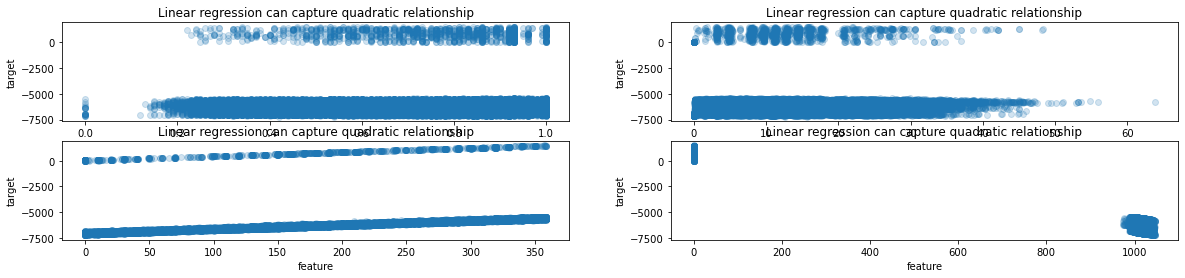

In [5]:
df = weather_df.copy()

df['Y'] = 37.92 -3.24*weather_df['Humidity'] -2.01*weather_df['Wind Speed (km/h)'] +4.04*weather_df['Wind Bearing (degrees)'] -6.91*weather_df['Pressure (millibars)']

lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

X = df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

# we plot the estimated Y and X
# the relationship should be quadratic
plt.figure(figsize=(20,4))

plt.subplot(2,2,1)
plt.scatter(X["Humidity"], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(2,2,2)
plt.scatter(X["Wind Speed (km/h)"], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(2,2,3)
plt.scatter(X["Wind Bearing (degrees)"], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(2,2,4)
plt.scatter(X["Pressure (millibars)"], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')

plt.show()

**2. Assumption two: the error term should be zero on average**

In [6]:
predictions = lrm.predict(X)
errors = y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -3.932431523914229e-15


**3. Assumption three: homoscedasticity**

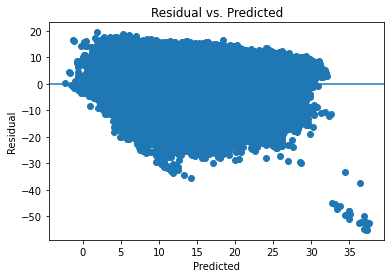

In [7]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [8]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


**4. Assumption four: low multicollinearity**

**5. Assumption five: error terms should be uncorrelated with one other**

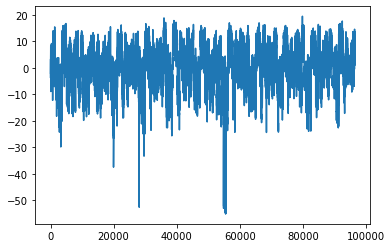

In [9]:
plt.plot(errors)
plt.show()

It seems that the error terms of our model are uncorrelated with each other.

**6. Assumption six: features shouldn't be correlated with the errors**

# 2. House prices
**1** To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [10]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

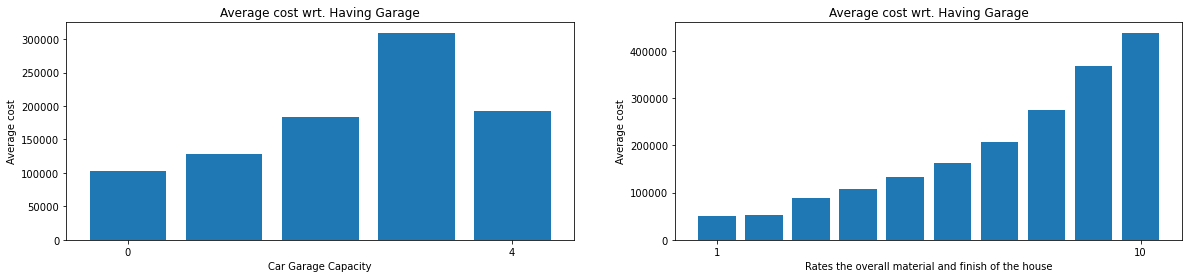

In [11]:

plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.bar(house_prices_df.groupby("GarageCars")["SalePrice"].mean().index, house_prices_df.groupby("GarageCars")["SalePrice"].mean())
plt.title("Average cost wrt. Having Garage")
plt.ylabel("Average cost")
plt.xlabel("Car Garage Capacity")
plt.xticks([0,4])

plt.subplot(1,2,2)
#sns.countplot(y='SalePrice',hue='HasGarage',data = df_new)
#plt.xticks([0,1])

plt.bar(house_prices_df.groupby("OverallQual")["SalePrice"].mean().index, house_prices_df.groupby("OverallQual")["SalePrice"].mean())
plt.title("Average cost wrt. Having Garage")
plt.ylabel("Average cost")
plt.xlabel("Rates the overall material and finish of the house")
plt.xticks([1,10])

plt.show()

In [30]:
from sklearn import linear_model

# b is the target variable
b = house_prices_df['SalePrice']
# a is the feature set which includes
# is_male and is_smoker variables
a = house_prices_df[['GarageCars','OverallQual']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(a, b)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)





Coefficients: 
 [27489.18591479 36513.41781607]

Intercept: 
 -90362.42418647182


In [31]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
a = sm.add_constant(a)

results = sm.OLS(b, a).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1468.
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        00:29:15   Log-Likelihood:                -17738.
No. Observations:                1460   AIC:                         3.548e+04
Df Residuals:                    1457   BIC:                         3.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.036e+04   5436.430    -16.622      0.000   -1.01e+05   -7.97e+04
GarageCars   2.749e+04   2005.921     13.704      0.000    2.36e+04    3.14e+04
OverallQual  3.651e+04   1083.918     33.687      0.000    3.44e+04    3.86e+04
==============================================================================
Omnibus:                      692.914   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8706.245
Skew:                           1.882   Prob(JB):                         0.00
Kurtosis:                      14.356   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2** Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

**2.1. Assumption one: linearity of the model in the coefficients**


Coefficients: 
 [27489.18 36513.41]

Intercept: 
 -90362.41999999998


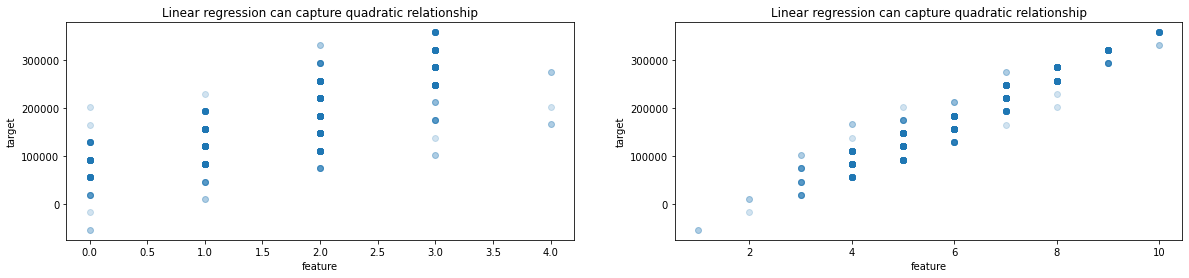

In [32]:
dfn = house_prices_df.copy()

dfn['Y'] = -90362.42 +27489.18*dfn['GarageCars'] +36513.41*dfn['OverallQual']
lrm_example = linear_model.LinearRegression()
lrm_example.fit(dfn[['GarageCars','OverallQual']],dfn["Y"])

# predictions of the linear regression
predictionss = lrm_example.predict(dfn[['GarageCars','OverallQual']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

a = dfn[['GarageCars','OverallQual']]

# we plot the estimated Y and X
# the relationship should be quadratic
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.scatter(a["GarageCars"], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')

plt.subplot(1,2,2)
plt.scatter(a["OverallQual"], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')


plt.show()

**2.2. Assumption two: the error term should be zero on average**

In [36]:
predictionss = lrm.predict(a)
errorss = b - predictionss

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errorss)))

Mean of the errors in the medical costs model is: 4.449297916399289e-11


**2.3.** Assumption three: homoscedasticity

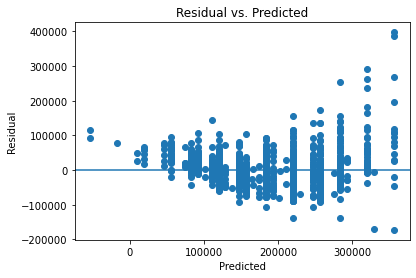

In [37]:
plt.scatter(predictionss, errorss)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**2.4. Assumption four: low multicollinearity**

**2.5. Assumption five: error terms should be uncorrelated with one other**

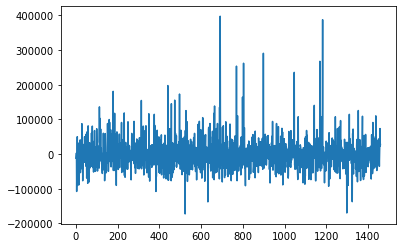

In [38]:
plt.plot(errorss)
plt.show()

**2.6. Assumption six: features shouldn't be correlated with the errors**